**Unsupervised Learning: K-Means Clustering**

This is an example taken from YouTube: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

The k-means algorithm divides a set of samples into disjoint clusters , each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>&#x3BC;</mi>
        <mi>j</mi>
      </msub>
      <mo>&#x2208;</mo>
      <mi>C</mi>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mi>j</mi>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
</math>

K-means is often referred to as Lloyd’s algorithm.

In basic terms, the algorithm has three steps. 
1. The first step chooses the initial centroids, with the most basic method being to choose samples from the dataset . 
After initialization, K-means consists of looping between the two other steps. 
2. The first step assigns each sample to its nearest centroid. 
3. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

In [88]:
import pandas as pd

df = pd.read_csv("./data/force2020_data_unsupervised_learning.csv", index_col="DEPTH_MD")


Check and clean our data set

In [89]:
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342


In [90]:
df.tail()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN
3271.872,2.738337,22.253584,0.174617,NaN,NaN
3272.024,2.792922,19.829920,0.176627,NaN,NaN


We can see some NaN values in our data set

Let's verify if there are any NaN values

In [91]:
df.isna().values.any()

True

Remove the NaN rows from our data set

In [92]:
df.dropna(inplace=True)

In [93]:
df.isna().values.any()

False

Now, let's check for any duplicated data

In [94]:
df.duplicated().values.any()

False

In [95]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


After removing NaN data, we can observe the count is the same

Now, let's standardize our data using sklearn's <code>StandardScaler</code> and then transform our data using the scaler before applying K-means

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]] = scaler.fit_transform(df[["RHOB", "GR", "NPHI", "PEF", "DTC"]]) 
# "_T" means data that has been transformed
# fit_transform(X, y=None, sample_weight=None): Compute clustering and transform X to cluster-distance space.

In [97]:
df.head(10)

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
1139.464,1.762011,54.480759,0.588014,1.377215,150.236420,-1.541988,-0.226514,1.245981,-1.395320,0.948455
1139.616,1.693400,51.365631,0.563947,1.283025,156.456635,-1.814704,-0.330693,1.073092,-1.447162,1.153114
1139.768,1.636616,50.678062,0.582253,1.256915,162.392105,-2.040411,-0.353688,1.204599,-1.461533,1.348404
1139.920,1.619630,52.008244,0.603731,1.314987,163.404480,-2.107929,-0.309202,1.358895,-1.429570,1.381713


Now, let's apply K-means clustering

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a function to work out the optimum number of clusters
def optimize_k_means(data, max_k):
    means = [] # means are commonly called the cluster "centroids"
    inertias = [] # inertia can be recognized as a measure of how internally coherent clusters are
    # cluster with high inertias means the sum of squared distances to the nearest cluster centers (centroids) and the points is high
    # The K-means algorithm aims to choose centroids that minimise the inertia or within-cluster sum-of-squares criterion

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data) # fit(X, y=None, sample_weight=None): Compute k-means clustering.

        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.figure(dpi=200)
    plt.plot(means, inertias, marker="o", linestyle="-") # "o-" means circled marker and solid line
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

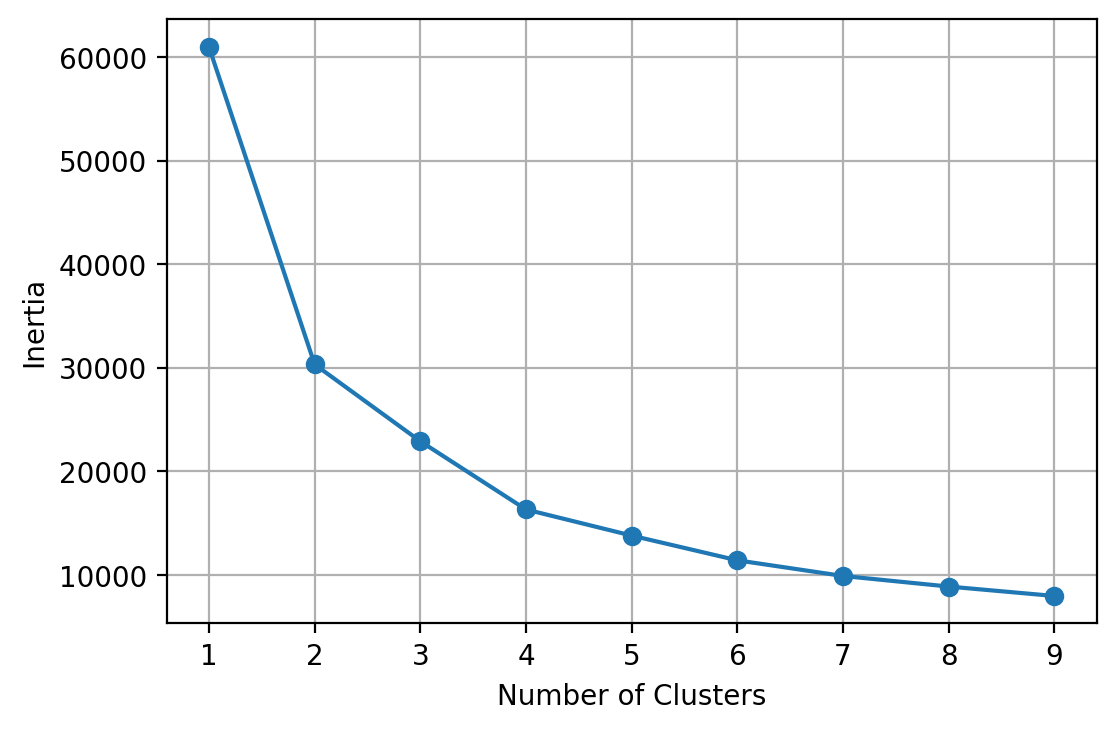

In [99]:
optimize_k_means(df[["RHOB_T", "GR_T", "NPHI_T", "PEF_T", "DTC_T"]], 10)

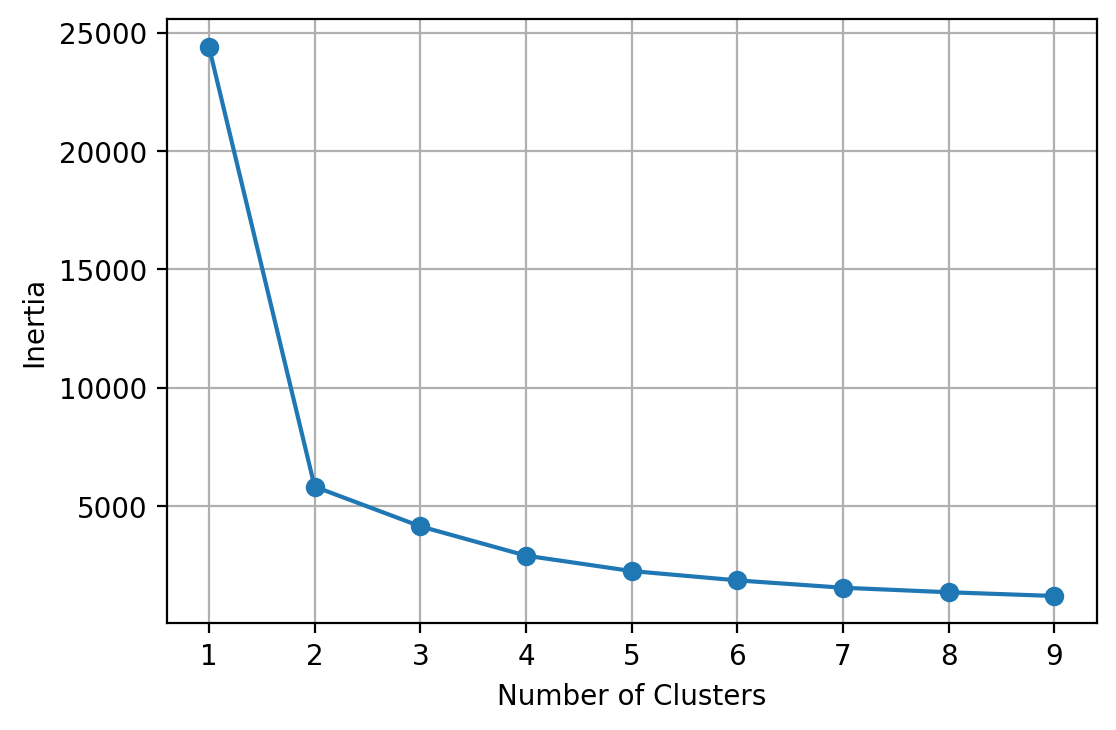

In [100]:
optimize_k_means(df[["RHOB_T", "NPHI_T"]], 10)

In the plot above, we can observe that the inertia (the sum of squared distances to the nearest cluster center) decreases as we increase the number of clusters.

We can see that there is a big change in inertia and slope starting from 2 clusters onwards.

**Applying K-Means Clustering:**

In [101]:
kmeans = KMeans(n_clusters=3)

In [102]:
kmeans.fit(df[["RHOB_T", "NPHI_T"]])

KMeans(n_clusters=3)

In [103]:
kmeans.labels_ # Labels of each point

array([0, 0, 0, ..., 1, 1, 1])

In [104]:
kmeans.cluster_centers_

array([[-0.64010527,  0.63145784],
       [ 0.89943434, -0.65756929],
       [ 1.58229936, -1.88923531]])

In [105]:
df["kmeans_3"] = kmeans.labels_

In [106]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1


**Plotting the results:**

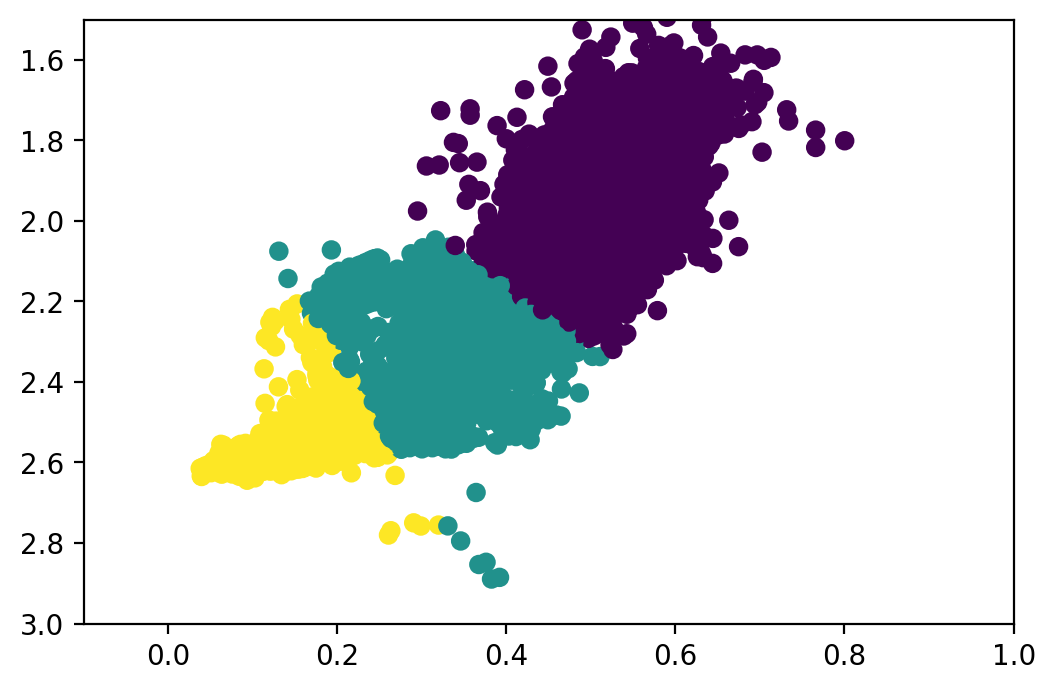

In [107]:
plt.figure(dpi=200)
plt.scatter(x=df["NPHI"], y=df["RHOB"], c=df["kmeans_3"])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
# plt.xlim(min(df["NPHI"]), max(df["NPHI"]))
# plt.ylim(min(df["RHOB"]), max(df["RHOB"]))
plt.show()

**Creating Multiple Clusters:**

In [108]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["NPHI_T", "RHOB_T"]])
    df[f"KMeans_{k}"] = kmeans.labels_

In [109]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0,0,0,0,3,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0,0,0,0,3,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0,0,0,0,3,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0,0,0,0,3,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1,0,1,2,1,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1,0,1,2,1,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1,0,1,2,1,1


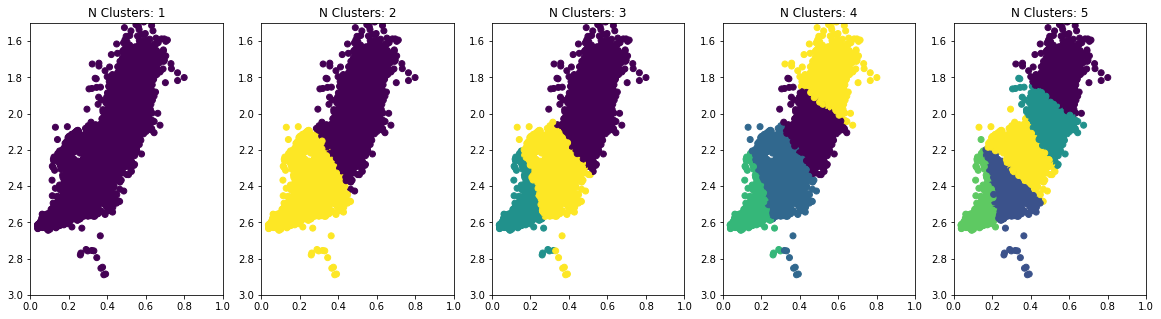

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df["NPHI"], y=df["RHOB"], c=df[f"KMeans_{i}"])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f"N Clusters: {i}")